In [189]:
# It will list the files in the input directory.
import os
print(os.listdir(r"C:\Users\Abinaya\OneDrive\Documents\ml_flood-master\Flood-Prediction-Model-master"))  # Name of the project Directory

['.ipynb_checkpoints', 'CLASSICAL_MODEL.ipynb', 'download.png', 'Final_dataset.csv', 'Flood_Prediction.ipynb', 'kerala.csv', 'LICENSE', 'predicted_probabilities_knn.csv', 'predicted_probabilities_svc.csv', 'README.md']


In [190]:
# Ignoring Warnings.
import warnings
warnings.filterwarnings('ignore')

In [191]:
# Directory where our Dataset is stored for processing in the ML Model.
os.chdir(r'C:\Users\Abinaya\OneDrive\Documents\ml_flood-master\Flood-Prediction-Model-master') # Path of our Project Folder
os.getcwd()

'C:\\Users\\Abinaya\\OneDrive\\Documents\\ml_flood-master\\Flood-Prediction-Model-master'

In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('Final_dataset.csv')
print(data)

       Sl Station_Names  Year  Month  Max_Temp  Temperature  Min_Temp  \
0     0.0       Barisal  1949      1      29.4    29.400000      12.3   
1     1.0       Barisal  1949      2      33.9    23.100000      15.2   
2     2.0       Barisal  1949      3      36.7    25.950000      20.2   
3     3.0       Barisal  1949      4      33.9    27.050000      23.9   
4     4.0       Barisal  1949      5      35.6    29.750000      25.0   
...   ...           ...   ...    ...       ...          ...       ...   
4627  NaN           UAE  2017      8       NaN    19.800000       NaN   
4628  NaN           UAE  2017      9       NaN    20.147014       NaN   
4629  NaN           UAE  2017     10       NaN    20.241134       NaN   
4630  NaN           UAE  2017     11       NaN    21.610621       NaN   
4631  NaN           UAE  2017     12       NaN    19.984416       NaN   

        Rainfall  Flood Occurrence  
0       0.000000               NaN  
1       9.000000               NaN  
2       8.00

In [193]:

column_to_fill = 'Flood Occurrence'  # Replace 'column_name' with the name of your col
# Fill empty values with 0 for the specified column
data[column_to_fill] = data[column_to_fill].fillna(0)

In [194]:
data.corr()

,Sl,Year,Month,Max_Temp,Temperature,Min_Temp,Rainfall,Flood Occurrence
Sl,1.000000,9.484042e-02,6.974079e-04,-0.028599,-0.035599,-0.001645,0.047520,-0.039005
Year,0.094840,1.000000e+00,-1.859261e-16,0.098011,0.072808,0.033942,-0.077087,-0.044082
Month,0.000697,-1.859261e-16,1.000000e+00,-0.040881,0.430124,0.229858,0.132803,0.104405
Max_Temp,-0.028599,9.801068e-02,-4.088143e-02,1.000000,0.723798,0.710666,0.286804,0.157889
Temperature,-0.035599,7.280786e-02,4.301240e-01,0.723798,1.000000,0.910642,0.503721,0.352546
Min_Temp,-0.001645,3.394169e-02,2.298576e-01,0.710666,0.910642,1.000000,0.623163,0.435508
Rainfall,0.047520,-7.708657e-02,1.328035e-01,0.286804,0.503721,0.623163,1.000000,0.788715
Flood Occurrence,-0.039005,-4.408189e-02,1.044052e-01,0.157889,0.352546,0.435508,0.788715,1.000000


In [195]:
columns_to_remove = ['Max_Temp', 'Min_Temp', ]  # Add the names of columns you want to remove

# Remove the specified columns from the DataFrame
data = data.drop(columns=columns_to_remove)

In [196]:
data.corr()

,Sl,Year,Month,Temperature,Rainfall,Flood Occurrence
Sl,1.000000,9.484042e-02,6.974079e-04,-0.035599,0.047520,-0.039005
Year,0.094840,1.000000e+00,-1.859261e-16,0.072808,-0.077087,-0.044082
Month,0.000697,-1.859261e-16,1.000000e+00,0.430124,0.132803,0.104405
Temperature,-0.035599,7.280786e-02,4.301240e-01,1.000000,0.503721,0.352546
Rainfall,0.047520,-7.708657e-02,1.328035e-01,0.503721,1.000000,0.788715
Flood Occurrence,-0.039005,-4.408189e-02,1.044052e-01,0.352546,0.788715,1.000000


In [197]:
#We seperate the prediction data:

In [198]:
x=data.iloc[:,1:6]
print(x)

     Station_Names  Year  Month  Temperature    Rainfall
0          Barisal  1949      1    29.400000    0.000000
1          Barisal  1949      2    23.100000    9.000000
2          Barisal  1949      3    25.950000    8.000000
3          Barisal  1949      4    27.050000  140.000000
4          Barisal  1949      5    29.750000  217.000000
...            ...   ...    ...          ...         ...
4627           UAE  2017      8    19.800000    1.275455
4628           UAE  2017      9    20.147014    1.555844
4629           UAE  2017     10    20.241134    0.135065
4630           UAE  2017     11    21.610621    0.914286
4631           UAE  2017     12    19.984416   15.089221

[4632 rows x 5 columns]


In [199]:
y=data.iloc[:,-1]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4627    0.0
4628    0.0
4629    0.0
4630    0.0
4631    0.0
Name: Flood Occurrence, Length: 4632, dtype: float64

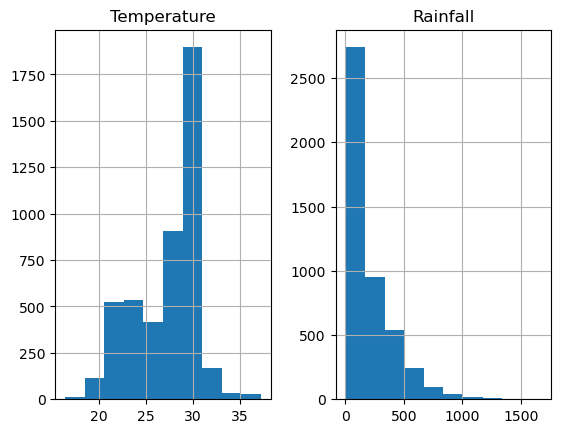

In [200]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['Temperature','Rainfall']]
c.hist()
plt.show()

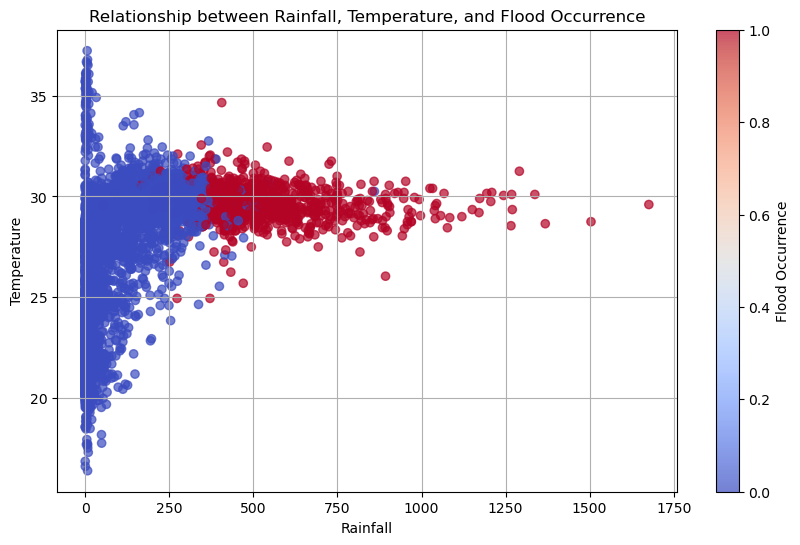

In [201]:

temperature = data['Temperature']
rainfall = data['Rainfall']
flood_occurrence = data['Flood Occurrence']

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, temperature, c=flood_occurrence, cmap='coolwarm', marker='o', alpha=0.7)

# Add labels and title
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.title('Relationship between Rainfall, Temperature, and Flood Occurrence')

# Add colorbar legend for flood occurrence
plt.colorbar(label='Flood Occurrence')

# Show plot
plt.grid(True)
plt.show()

In [202]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
# minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
# minmax.fit(x).transform(x)

x1 = x.select_dtypes(include=['number'])


# Scale the numeric columns between 0 and 1
minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
#scaled_numeric_columns = minmax.fit_transform(numeric_columns)
minmax.fit(x1).transform(x1)


array([[1.44927536e-02, 0.00000000e+00, 6.24176202e-01, 0.00000000e+00],
       [1.44927536e-02, 9.09090909e-02, 3.21432720e-01, 5.36992840e-03],
       [1.44927536e-02, 1.81818182e-01, 4.58388105e-01, 4.77326969e-03],
       ...,
       [1.00000000e+00, 8.18181818e-01, 1.84051297e-01, 8.05876700e-05],
       [1.00000000e+00, 9.09090909e-01, 2.49861309e-01, 5.45516536e-04],
       [1.00000000e+00, 1.00000000e+00, 1.71714803e-01, 9.00311502e-03]])

In [203]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2)

x_train.head()

,Year,Month,Temperature,Rainfall
1592,1967,9,29.650000,172.000000
2599,2001,8,30.000000,197.000000
4506,2007,7,27.083371,2.485714
522,1992,7,30.700000,299.000000
781,1966,2,22.800000,0.000000


In [204]:
training_size = x_train.shape[0]
print(training_size)

3705


In [205]:
x_train.dtypes

Year             int64
Month            int64
Temperature    float64
Rainfall       float64
dtype: object

In [206]:
x_test.head()

,Year,Month,Temperature,Rainfall
1308,2010,1,21.35,0.000000
1373,1949,6,28.75,315.578125
3062,1971,3,23.85,34.000000
2643,2005,4,28.95,91.000000
735,2010,4,30.05,10.000000


In [207]:
y_train=y_train.astype('int')
y_train

1592    0
2599    0
4506    0
522     1
781     0
       ..
3882    0
2303    0
2705    1
1097    0
482     0
Name: Flood Occurrence, Length: 3705, dtype: int32

In [208]:
print(y_train.value_counts())

0    2918
1     787
Name: Flood Occurrence, dtype: int64


NameError: name 'classification_report' is not defined

# Using Prediction Algorithms:


# KNN classifier to predict

In [227]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)


ValueError: X has 5 features, but KNeighborsClassifier is expecting 4 features as input.

In [210]:
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict
probabilities = clf.predict_proba(x_test)
print(probabilities)

Predicted Values for the Floods:
[[1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


In [211]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
1308    0.0
1373    0.0
3062    0.0
2643    0.0
735     0.0
       ... 
2318    0.0
3103    1.0
636     0.0
315     0.0
2452    0.0
Name: Flood Occurrence, Length: 927, dtype: float64


In [212]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

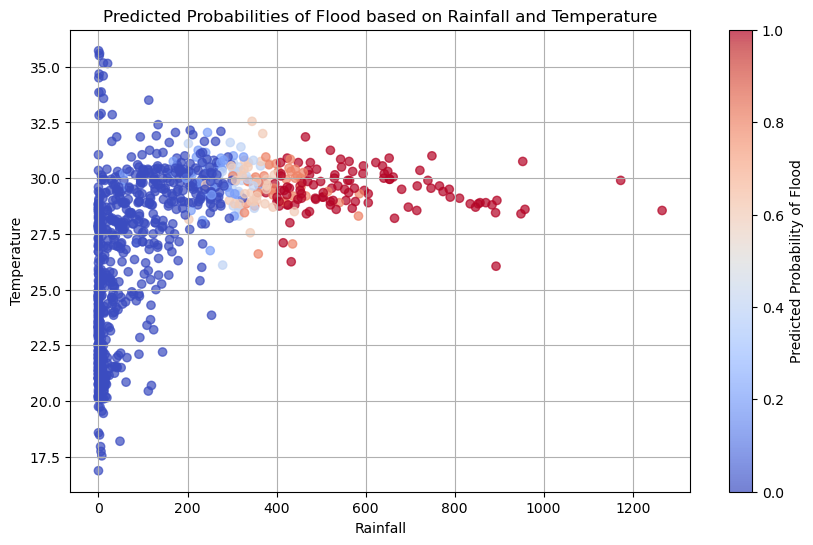

In [213]:
import matplotlib.pyplot as plt

# Assuming 'probabilities' is the predicted probabilities for each class for each sample
# 'x_test' contains the features (rainfall and temperature) for the test set

# Extract rainfall and temperature from x_test
rainfall = x_test['Rainfall']  # Assuming 'Rainfall' is the column name for rainfall
temperature = x_test['Temperature'] 

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, temperature, c=probabilities[:, 1], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Probability of Flood')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.title('Predicted Probabilities of Flood based on Rainfall and Temperature')
plt.grid(True)
plt.show()


In [214]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [215]:
knn_acc

array([0.93765182, 0.93198381, 0.94251012])

In [216]:
knn_proba

array([[1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [217]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:94.498382
Recall Score:86.111111
ROC score:91.315261
[[721  26]
 [ 25 155]]


In [218]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [219]:
svc_acc

array([0.94736842, 0.94331984, 0.9611336 ])

In [220]:
svc_proba

array([[9.95134605e-01, 4.86539540e-03],
       [9.79257277e-01, 2.07427232e-02],
       [9.99282466e-01, 7.17534338e-04],
       ...,
       [3.05433394e-02, 9.69456661e-01],
       [8.64874194e-01, 1.35125806e-01],
       [9.98569806e-01, 1.43019434e-03]])

In [221]:
svc_scores=svc_proba[:,1]
svc_scores

array([4.86539540e-03, 2.07427232e-02, 7.17534338e-04, ...,
       9.69456661e-01, 1.35125806e-01, 1.43019434e-03])

In [222]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.

In [223]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 

In [224]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:95.361381
recall score:83.333333
roc score:90.796519
[[734  13]
 [ 30 150]]


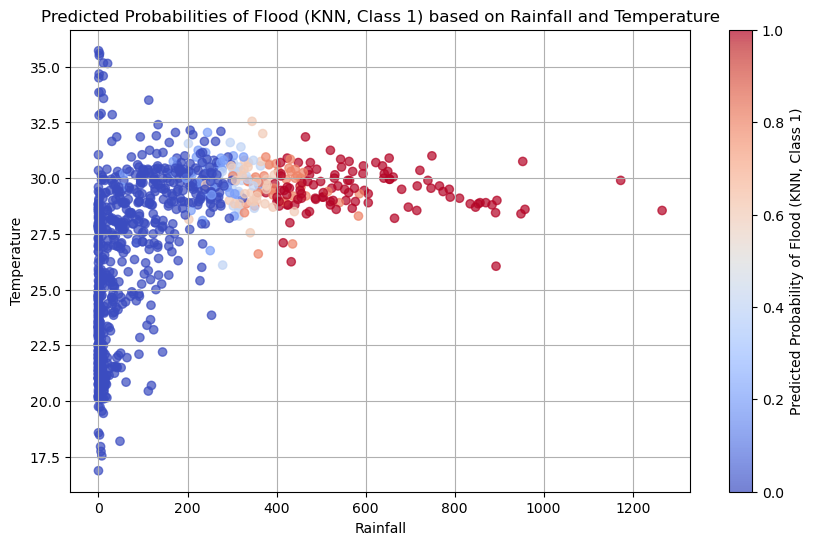

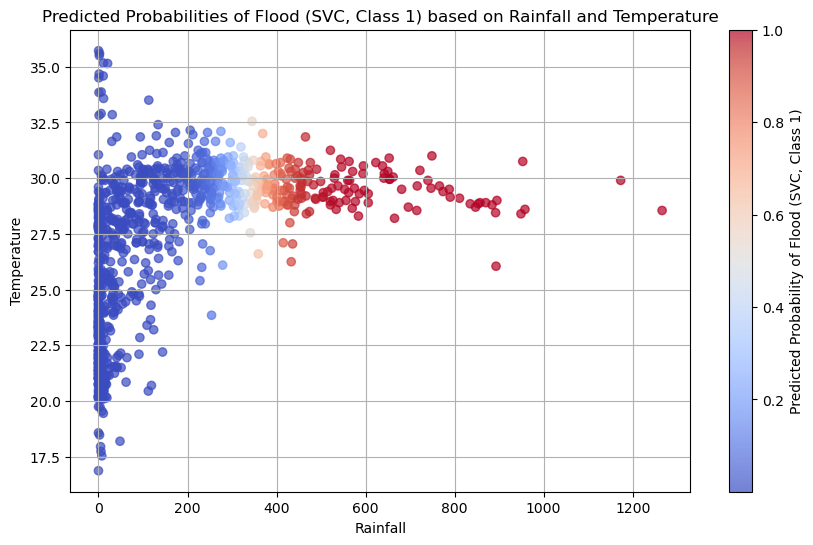

In [225]:
data_with_probabilities_knn = x_test.copy()
data_with_probabilities_svc = x_test.copy()

# Add predicted probabilities for KNN
probabilities_knn = clf.predict_proba(x_test)
data_with_probabilities_knn['Probability_Flood_KNN_0'] = probabilities_knn[:, 0]  # Probability for class 0
data_with_probabilities_knn['Probability_Flood_KNN_1'] = probabilities_knn[:, 1]  # Probability for class 1

# Add predicted probabilities for SVC
probabilities_svc = svc_classifier.predict_proba(x_test)
data_with_probabilities_svc['Probability_Flood_SVC_0'] = probabilities_svc[:, 0]  # Probability for class 0
data_with_probabilities_svc['Probability_Flood_SVC_1'] = probabilities_svc[:, 1]  # Probability for class 1

# Plot the probability for flood with respect to rain and temperature for KNN
plt.figure(figsize=(10, 6))
plt.scatter(data_with_probabilities_knn['Rainfall'], data_with_probabilities_knn['Temperature'], c=data_with_probabilities_knn['Probability_Flood_KNN_1'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Probability of Flood (KNN, Class 1)')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.title('Predicted Probabilities of Flood (KNN, Class 1) based on Rainfall and Temperature')
plt.grid(True)
plt.show()

# Plot the probability for flood with respect to rain and temperature for SVC
plt.figure(figsize=(10, 6))
plt.scatter(data_with_probabilities_svc['Rainfall'], data_with_probabilities_svc['Temperature'], c=data_with_probabilities_svc['Probability_Flood_SVC_1'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Probability of Flood (SVC, Class 1)')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.title('Predicted Probabilities of Flood (SVC, Class 1) based on Rainfall and Temperature')
plt.grid(True)
plt.show()

In [226]:
data_knn = x_test.copy()
data_svc = x_test.copy()

# Add predicted probabilities for KNN
probabilities_knn = clf.predict_proba(x_test)
data_knn['Probability_Flood_KNN_0'] = probabilities_knn[:, 0]  # Probability for class 0
data_knn['Probability_Flood_KNN_1'] = probabilities_knn[:, 1]  # Probability for class 1

# Add predicted probabilities for SVC
probabilities_svc = svc_classifier.predict_proba(x_test)
data_svc['Probability_Flood_SVC_0'] = probabilities_svc[:, 0]  # Probability for class 0
data_svc['Probability_Flood_SVC_1'] = probabilities_svc[:, 1]  # Probability for class 1

# Save the datasets to CSV files
data_knn.to_csv('predicted_probabilities_knn.csv', index=False)
data_svc.to_csv('predicted_probabilities_svc.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'predicted_probabilities_knn.csv'

In [243]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np
import matplotlib as plt


#with open("/content/drive/My Drive/NYUAD/65_Years_of_Weather_Data_Bangladesh_(1948 _2013).csv", "r") as file:
# file = open(r"C:\Users\Abinaya\OneDrive\Documents\ml_flood-master\Flood-Prediction-Model-master\new.csv", "r")
# with open(r"C:\Users\Abinaya\OneDrive\Documents\ml_flood-master\Flood-Prediction-Model-master\new.csv", "r") as file:
#   file = open(r"C:\Users\Abinaya\OneDrive\Documents\ml_flood-master\Flood-Prediction-Model-master\new.csv", "r")

import os
print(os.listdir(r"C:\Users\Abinaya\OneDrive\Documents\ml_flood-master")) 
os.chdir(r'C:\Users\Abinaya\OneDrive\Documents\ml_flood-master') # Path of our Project Folder
os.getcwd()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset = pd.read_csv('new.csv')


#dataset['Avg Temp'] = (dataset['Min Temp'] + dataset['Max Temp']) / 2
dataset['Avg Temp'] = (dataset['Min_Temp'] + dataset['Max_Temp']) / 2
#Drop min_temp and max_temp columns
#dataset = dataset.drop(['Min Temp', 'Max Temp', 'Station Names','Unnamed: 0','YEAR','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period'], axis=1)
dataset = dataset.drop(['Max_Temp', 'Min_Temp','Sl', 'Station_Names', 'Month','Rainfall','Year','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period', 'Station_Number'], axis=1)
#Assuming dataset is your pandas DataFrame
print(dataset["Flood?"])
#Fill empty values in "Flood?" column with 0
dataset['Flood?'].fillna(0, inplace=True)

#Removing Outliers
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset = dataset.reset_index(drop=True)

#Splitting features and target variable
Y = dataset['Flood?']
X = dataset.drop(columns=['Flood?'])

#Standardize the features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

#Splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

#Check X_train
print(X_train)


['.gitignore', '.ipynb_checkpoints', 'data', 'DATA1.csv', 'environment.yml', 'Final.ipynb', 'Flood-Prediction-Model-master', 'LICENSE', 'new.csv', 'notebooks', 'python', 'README-smallsampledata.md', 'README.md', '__init__.py']
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
20539    1.0
20540    NaN
20541    NaN
20542    NaN
20543    NaN
Name: Flood?, Length: 20544, dtype: float64
[[-3.04173306e+00  8.40715714e-01 -6.66070701e-01  9.38315891e-01
   6.18826616e-01]
 [-1.92387555e+00 -1.49136428e+00 -1.53168800e+00  4.82589376e-01
  -1.99006481e+00]
 [ 8.70768234e-01 -9.39029545e-01  4.39995848e-01 -4.70655167e-01
   1.29659474e-01]
 ...
 [ 1.01050042e+00  1.82264413e+00  1.25752330e+00 -1.56718490e+00
   7.41118402e-01]
 [-5.78454183e-01 -5.52939683e-02 -1.09390454e+00  1.31072472e+00
  -9.31608321e-01]
 [-3.86821467e-01  1.60171024e+00 -1.33932860e+00 -2.53471811e-03
  -2.64391836e-01]]


              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      3184
         1.0       0.74      0.62      0.67       816

    accuracy                           0.88      4000
   macro avg       0.82      0.78      0.80      4000
weighted avg       0.87      0.88      0.87      4000

[[0.72748662 0.27251338]]


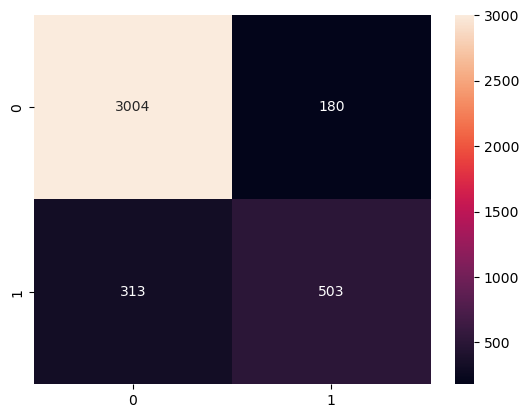

In [248]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d") # plot the confusion matrix as a heatmap

#print(clf.predict_proba([[68, 0.453704, 0.6, 7.83, 20.85]]))
#[[0.72748662 0.27251338]]



In [244]:
print(dataset)

       Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  Flood?  \
0                   68.0    0.453704             0.6         7.831915     0.0   
1                   63.0    0.659259             0.9         8.314894     0.0   
2                   59.0    1.085185             1.5         8.131915     0.0   
3                   71.0    1.772222             3.9         8.219149     0.0   
4                   76.0    1.703704             4.1         7.046809     0.0   
...                  ...         ...             ...              ...     ...   
19991               88.0    2.500000             6.2         3.800000     1.0   
19992               88.0    3.000000             6.1         4.200000     0.0   
19993               85.0    2.500000             4.4         5.600000     0.0   
19994               79.0    2.100000             1.7         8.400000     0.0   
19995               72.0    3.000000             0.9         8.100000     0.0   

       Avg Temp  
0        